In [1]:
# Run in python console
import nltk; nltk.download('stopwords')
import spacy
from spacy.lang.zh.stop_words import STOP_WORDS
stop_words = spacy.lang.zh.stop_words.STOP_WORDS

from spacy.lang.zh.examples import sentences 
# Run in terminal or command prompt

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\onrik/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### 预处理

In [2]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
# import pyLDAvis.gensim  # don't skip this
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [3]:
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [4]:
import pandas as pd
import urllib.request
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import jieba
import pandas as pd
import re
import csv
# 创建停用词列表
def stopwordslist():
    stopwords = [line.strip() for line in open('chinsesstoptxt.txt',encoding='UTF-8').readlines()]
    return stopwords

# 对句子进行中文分词
def seg_depart(sentence):
    # 对文档中的每一行进行中文分词
    jieba.load_userdict('保留词.txt')
    sentence_depart = jieba.cut(sentence.strip())
    # 创建一个停用词列表
    stopwords = stopwordslist()
    # 输出结果为outstr
    outstr = ''
    # 去停用词
    for word in sentence_depart:
        if word not in stopwords:
            if word != '\t':
                outstr += word
                outstr += " "
    return outstr

def chinese_word_cut(line):
#     line = processing(line[1])
    line = line.replace(' ','')
    line_seg = seg_depart(line)
    return line_seg

df = pd.read_excel("C:/Users/onrik\\report\\0203_LDA\\CCTV 가공.xlsx")
# Remove Emails
df['content'] = df['content'].apply(lambda x: re.sub('\S*@\S*\s?', '', x))

# # Remove new line characters
df['content'] = df['content'].apply(lambda x: re.sub('\s+', ' ', x))

# # Remove distracting single quotes
df['content'] = df['content'].apply(lambda x: re.sub("\'", "", x))
df['Text_cut'] = df.content.apply(chinese_word_cut)
ddf = df
df

Building prefix dict from the default dictionary ...
2022-03-28 19:01:40,054 : DEBUG : Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\onrik\AppData\Local\Temp\jieba.cache
2022-03-28 19:01:40,055 : DEBUG : Loading model from cache C:\Users\onrik\AppData\Local\Temp\jieba.cache
Loading model cost 0.591 seconds.
2022-03-28 19:01:40,644 : DEBUG : Loading model cost 0.591 seconds.
Prefix dict has been built successfully.
2022-03-28 19:01:40,661 : DEBUG : Prefix dict has been built successfully.


,title,url,date,content,Text_cut
0,个人信息保护法如何捍卫个人信息安全,https://news.cctv.com/2021/09/14/ARTIe1P4nF1k1...,2021-09-14,在信息化时代，个人信息保护已成为广大人民群众最关心最直接最现实的利益问题之一。通讯员章善玉摄...,信息化 时代 个人信息 保护 群众 关心 现实 利益 通讯员 章善玉摄 □ 记者 朱 宁宁 ...
1,个人信息保护法实施应关注十大核心要点,https://news.cctv.com/2021/11/09/ARTIdlKiSycqR...,2021-11-09,□ 王春晖于11月1日实施的《中华人民共和国个人信息保护法》，在国家层面建立了个人信息保护制...,□ 王 春晖 11 月 日 实施 中华人民共和国 个人信息保护法 国家 层面 建立 个人信息...
2,《个人信息保护法》即将施行 禁止大数据“杀熟”,https://news.cctv.com/2021/09/13/ARTIqQYk4Ckpw...,2021-09-13,5月31日，在江苏省扬州市汤汪中心小学，社区志愿者给学生们介绍防范电信诈骗、保护个人信息的知...,月 31 日 江苏省 扬州市 汤 汪 中心小学 社区 志愿者 学生 介绍 防范 电信 诈骗 ...
3,《个人信息保护法》开始施行 “大数据杀熟”涉嫌违法,https://news.cctv.com/2021/11/01/ARTIkGhzEFdc7...,2021-11-01,央视网消息（记者朱春燕豆瑞华）：11月1日起，《个人信息保护法》正式施行。“这是我国在个人信...,央视网 消息 记者 朱春燕 豆瑞华 11 月 日起 个人信息保护法 正式 施行 这是 我国 ...
4,权威专家解读来了！《个人信息保护法》将这样影响你我生活,https://news.cctv.com/2021/08/24/ARTIIzq1doWzU...,2021-08-24,央视网消息：日前，十三届全国人大常委会第三十次会议表决通过了《中华人民共和国个人信息保护法》...,央视网 消息 日前 十三届 全国人大常委会 第三十次 会议 表决 中华人民共和国 个人信息保...
5,《个人信息保护法》下月实施，中消协发布重要提示！,https://news.cctv.com/2021/10/28/ARTIdkMnS4m50...,2021-10-28,11月1日，《个人信息保护法》将正式实施。10月28日，中消协发布提示：未经消费者同意，经营...,11 月 日 个人信息保护法 正式 实施 10 月 28 日 中消协 发布 提示 未经 消费...
6,个人信息保护法草案将二审：拟增加死者个人信息保护的规定,https://news.cctv.com/2021/04/22/ARTIrZU6uh1Dd...,2021-04-22,中新网4月22日电 全国人大常委会法制工作委员会今日举行记者会，发言人臧铁伟介绍立法工作有关...,中新网 月 22 日电 全国人大常委会法制工作委员会 今日 记者会 发言人 臧铁伟 介绍 立...
7,APP“不授权不让用”是否违法？权威专家解读《个人信息保护法》,https://news.cctv.com/2021/08/23/ARTIqcv3OOpII...,2021-08-23,央视网消息：最新通过的《个人信息保护法》11月1日将施行，其中明确了很多网友们关心的问题。A...,央视网 消息 最新 个人信息保护法 11 月 日 施行 网友 关心 APP 授权 不让 违法...
8,大数据杀熟、强制授权？《个人信息保护法》这样保护你的权益！,https://news.cctv.com/2021/08/21/ARTIaorVJhruZ...,2021-08-21,央视网消息（记者 王汝希）：十三届全国人大常委会第三十次会议8月20日表决通过《中华人民共和...,央视网 消息 记者 王汝希 十三届 全国人大常委会 第三十次 会议 月 日 表决 中华人民共...
9,个人信息保护法草案将三审：拟对App过度收集个人信息等作出有针对性的规范,https://news.cctv.com/2021/08/13/ARTIv5AZGMvV7...,2021-08-13,十三届全国人大常委会第三十次会议将于8月17日至20日在北京举行。今天（13日）全国人大常委...,十三届 全国人大常委会 第三十次 会议 月 17 日至 日 北京 13 日 全国人大常委会法...


In [5]:
data = df.Text_cut.values.tolist()

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[1:2])


[['春晖', '实施', '中华人民共和国', '个人信息保护法', '国家', '层面', '建立', '个人信息', '保护', '制度', '个人信息', '保护', '宣传教育', '推动', '政府', '企业', '相关', '社会', '组织', '公众', '参与', '个人信息', '保护', '良好环境', '确保', '个人信息保护法', '各项', '社会', '生活', '落到实处', '建议', '学习', '贯彻实施', '个人信息保护法', '重点', '把握', '十大', '核心', '要点', '第一', '规范', '信息处理', '活动', '个人信息保护法', '核心', '个人信息保护法', '第一条', '保护', '个人信息', '权益', '规范', '信息处理', '活动', '个人信息', '利用', '宪法', '制定', '本法', '个人信息保护法', '实质', '功能', '一部', '信息处理', '活动', '行为规范', '规范', '信息处理', '活动', '处于', '个人信息保护法', '核心', '地位', '夯实', '这一', '关键环节', '确保', '保护', '个人信息', '权益', '个人信息', '利用', '目的', '个人信息', '内涵', '匿名', '个人信息保护法', '第四条', '第一款', '个人信息', '定义', '个人信息', '电子', '方式', '记录', '识别', '识别', '自然人', '信息', '包括', '匿名', '信息', '意味着', '个人信息', '匿名', '个人信息', '无需', '个人信息保护法', '相关', '这一', '体现', '个人信息保护法', '个人信息', '保护', '利用', '并重', '立法', '精神', '第三', '个人信息保护法', '域外', '效力', '我国', '个人信息保护法', '第三条', '第二款', '中华人民共和国', '境外', '中华人民共和国', '境内', '自然人', '个人信息', '活动', '情形', '本法', '以向', '境内', '自然人', '提供', '产品', '服务', '目的', '分析', '评估', '境内', '自

In [6]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
# trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
# trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
# print(trigram_mod[bigram_mod[data_words[0]]])

In [7]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

# def make_trigrams(texts):
#     return [trigram_mod[bigram_mod[doc]] for doc in texts]

# def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [8]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en

nlp = spacy.load('zh_core_web_sm')
# Do lemmatization keeping only noun, adj, vb, adv
# data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

# print(data_lemmatized[:1])
data_lemmatized = data_words_bigrams

In [9]:
data_lemmatized

[['信息化',
  '时代',
  '个人信息',
  '保护',
  '群众',
  '关心',
  '现实',
  '利益',
  '通讯员',
  '章善玉摄',
  '记者',
  '宁宁',
  '个人信息保护法',
  '日经',
  '十三届_全国人大常委会',
  '第三十次_会议',
  '表决',
  '社会各界',
  '关注度',
  '与日俱增',
  '制定',
  '个人信息保护法',
  '个人信息保护法',
  '生活',
  '影响',
  '个人信息保护法',
  '强化',
  '敏感',
  '个人信息',
  '保护',
  '业内',
  '专家',
  '近日',
  '接受',
  '法治',
  '日报',
  '记者',
  '采访',
  '详解',
  '个人信息保护法',
  '创新',
  '特色',
  '规则',
  '亮点',
  '回应',
  '关切',
  '彰显',
  '时代',
  '印记',
  '个人信息保护法',
  '出台',
  '时代背景',
  '国际',
  '国内',
  '蕴涵',
  '北京师范大学',
  '网络',
  '法治',
  '国际',
  '中心',
  '执行',
  '主任',
  '中国',
  '互联网',
  '协会',
  '研究_中心',
  '主任',
  '吴沈括',
  '吴沈括',
  '指出',
  '数字_经济',
  '蓬勃发展',
  '世界',
  '各国',
  '重视',
  '个人信息',
  '多重',
  '价值',
  '属性',
  '纷纷',
  '出台',
  '个人信息',
  '保护',
  '立法',
  '个人信息',
  '法律',
  '保护',
  '衡量',
  '一国',
  '法治',
  '文明',
  '法治',
  '水平',
  '指针',
  '我国',
  '处于',
  '数字化',
  '转型',
  '高质量',
  '发展',
  '阶段',
  '个人信息',
  '社会',
  '产业',
  '升级',
  '驱动力',
  '制定',
  '个人信息保护法',
  '保障',
  '公民',
  '个人信息',
  '权益',
  '个人信息',
  

### TF-IDF

In [10]:
### Term-Frequency
from collections import Counter
words = ''
for i in range(len(data_lemmatized)):
    t = ' '.join(data_lemmatized[i])
    words += t
words = words.split()
counts = Counter(words)
counts

Counter({'信息化': 26,
         '时代': 39,
         '个人信息': 920,
         '保护': 399,
         '群众': 28,
         '关心': 8,
         '现实': 12,
         '利益': 13,
         '通讯员': 1,
         '章善玉摄': 1,
         '记者': 71,
         '宁宁': 1,
         '个人信息保护法': 276,
         '日经': 1,
         '十三届_全国人大常委会': 15,
         '第三十次_会议': 9,
         '表决': 7,
         '社会各界': 5,
         '关注度': 1,
         '与日俱增': 1,
         '制定': 56,
         '生活': 37,
         '影响': 36,
         '强化': 24,
         '敏感': 107,
         '业内': 4,
         '专家': 34,
         '近日': 9,
         '接受': 17,
         '法治': 19,
         '日报': 2,
         '采访': 11,
         '详解': 1,
         '创新': 10,
         '特色': 5,
         '规则': 81,
         '亮点': 6,
         '回应': 22,
         '关切': 7,
         '彰显': 5,
         '印记': 2,
         '出台': 36,
         '时代背景': 1,
         '国际': 16,
         '国内': 8,
         '蕴涵': 1,
         '北京师范大学': 2,
         '网络': 66,
         '中心': 12,
         '执行': 8,
         '主任': 21,
         '中国': 

In [11]:
vocab = sorted(counts, key=counts.get, reverse=True)
tf_df = []
for voca in vocab:
    tf_df.append({'word': voca, 'term frequency': counts[voca]})
tf_df = pd.DataFrame(tf_df)
tf_df.head(10)

,word,term frequency
0,个人信息,920
1,信息,488
2,保护,399
3,个人信息保护法,276
4,同意,268
5,app,206
6,收集,205
7,法律,189
8,快递,186
9,用户,178


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
contents_tfidf = []
for i in range(len(data_lemmatized)):
    t = ' '.join(data_lemmatized[i])
    contents_tfidf.append(t)
vectorizer = TfidfVectorizer(max_features= 100)
X = vectorizer.fit_transform(contents_tfidf)

# # TF-IDF 행렬의 크기 확인
# print('TF-IDF 행렬의 크기 :',X.shape)
tf_idfdict=  vectorizer.get_feature_names()
data_array = X.toarray()
data_tdidf = pd.DataFrame(data_array, columns=tf_idfdict)
data_tdidf


,app,专家,个人信息,个人信息保护法,中国,互联网,产品,人脸,人脸识别,企业,...,责任,过度,进一步,违法,违法行为,部门,采集,隐私,非法,面单
0,0.000000,0.028793,0.568534,0.267337,0.063626,0.020370,0.000000,0.000000,0.000000,0.000000,...,0.070797,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.027272,0.126487,0.00000
1,0.000000,0.000000,0.617335,0.303480,0.000000,0.040699,0.044173,0.000000,0.000000,0.036956,...,0.070725,0.022087,0.000000,0.055434,0.027980,0.105935,0.000000,0.027244,0.050543,0.00000
2,0.170360,0.000000,0.515412,0.184273,0.020101,0.115839,0.041909,0.000000,0.000000,0.052593,...,0.022367,0.041909,0.000000,0.000000,0.000000,0.020101,0.068636,0.000000,0.000000,0.00000
3,0.000000,0.000000,0.322484,0.158532,0.000000,0.000000,0.036055,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.030164,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
4,0.163119,0.000000,0.346095,0.269387,0.000000,0.000000,0.025796,0.000000,0.100786,0.021582,...,0.000000,0.025796,0.000000,0.129492,0.000000,0.074237,0.112660,0.095462,0.000000,0.00000
5,0.000000,0.000000,0.164771,0.162002,0.000000,0.000000,0.000000,0.000000,0.383861,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
6,0.000000,0.000000,0.474650,0.200003,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.129471,0.121298,0.000000,0.000000,0.000000,0.116357,0.000000,0.000000,0.000000,0.00000
7,0.313752,0.452333,0.388325,0.190899,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.290585,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
8,0.257835,0.000000,0.319118,0.156877,0.000000,0.043830,0.000000,0.271149,0.309765,0.039799,...,0.000000,0.095143,0.000000,0.079599,0.000000,0.000000,0.103878,0.117361,0.000000,0.00000
9,0.076088,0.000000,0.470862,0.046295,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.084231,0.091964,0.070470,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000


In [13]:
def getTFIDF(text_series):
    """Performs TF-IDF calculation on a matrix of words grouped into cells."""
    vectorizer = TfidfVectorizer()

    matrix = vectorizer.fit_transform(text_series).todense()

    matrix_df = pd.DataFrame(matrix, columns=vectorizer.get_feature_names())


    return matrix_df.sum(axis=0).sort_values(ascending=False)

# # Create Corpus for TD-IDF analysis 
text_df = pd.DataFrame()
text_df["text_clean"] = data_lemmatized # Use the data_lemmatized for text analysis
text_to_tfidf = [",".join(text) for text in text_df["text_clean"].values]

# Getting TD-IDF scores for words 
topwords = getTFIDF(text_to_tfidf)
topwords.to_excel("topwords.xlsx")
topwords_50 = topwords[:50]
topwords_50.to_excel("CCTV_topwords_tf_idf_50.xlsx")

In [14]:
topwords

个人信息    10.898367
保护       5.013568
信息       4.833513
同意       4.072262
草案       3.384186
          ...    
待处理      0.014287
嘉善县      0.014287
归责       0.014287
倡导       0.014287
收件       0.014287
Length: 4384, dtype: float64

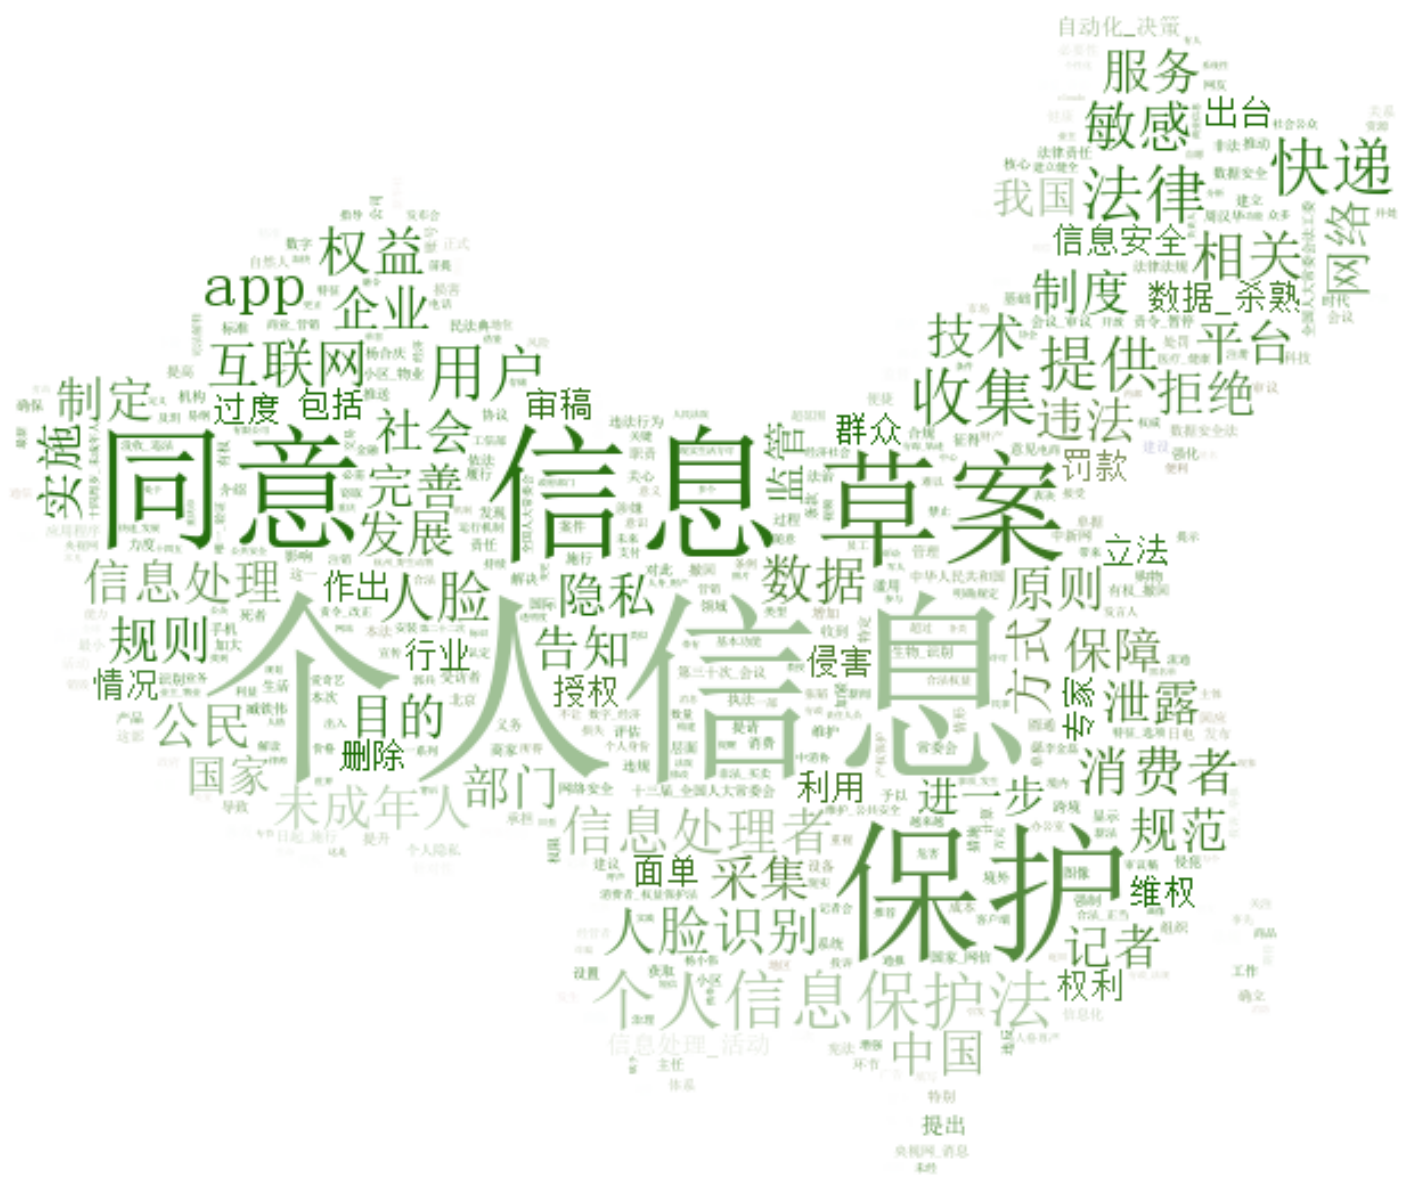

In [25]:
# Importing word cloud
import seaborn as sns
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import matplotlib.colors as mcolors
from PIL import Image

## Creating a masked wordcloud using TD-IDF
fig, ax = plt.subplots(figsize=(25,25))
custom_mask = np.array(Image.open("china5.jpg"))
w = WordCloud(font_path='C:\\Windows\\Fonts\\simsun.ttc',
              background_color = 'white',
              width=800,height=600,
              mask = custom_mask,
              mode='RGBA',
              max_words=2000).fit_words(topwords)
image_colors = ImageColorGenerator(custom_mask)
w.recolor(color_func = image_colors)
plt.imshow(w, interpolation="bilinear")
plt.axis("off")
plt.show()
fig.savefig('CCTV_TFIDF_Wordcloud.png', dpi=800)

### LDA

In [16]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 2), (13, 1), (14, 1), (15, 46), (16, 22), (17, 2), (18, 3), (19, 2), (20, 2), (21, 1), (22, 3), (23, 3), (24, 2), (25, 1), (26, 2), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 2), (35, 1), (36, 5), (37, 1), (38, 2), (39, 1), (40, 1), (41, 1), (42, 2), (43, 1), (44, 1), (45, 8), (46, 2), (47, 25), (48, 2), (49, 5), (50, 8), (51, 1), (52, 4), (53, 4), (54, 11), (55, 1), (56, 2), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 2), (64, 1), (65, 1), (66, 2), (67, 1), (68, 2), (69, 1), (70, 1), (71, 1), (72, 1), (73, 3), (74, 5), (75, 3), (76, 4), (77, 2), (78, 1), (79, 1), (80, 1), (81, 1), (82, 3), (83, 1), (84, 1), (85, 2), (86, 3), (87, 11), (88, 1), (89, 1), (90, 3), (91, 3), (92, 1), (93, 1), (94, 3), (95, 1), (96, 1), (97, 1), (98, 2), (99, 1), (100, 1), (101, 1), (102, 3), (103, 1), (104, 1), (105, 1), (106, 1), (107, 2), (108, 1), (109, 1), (11

In [17]:
# Download File: http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
# mallet_path = 'mallet-2.0.8/bin/mallet'  # update this path
# mallet_path = 'path/to/mallet-2.0.8/bin/mallet' # update this path
import os
os.environ.update({'MALLET_HOME':r'C:/Users/onrik/Downloads/mallet-2.0.8/mallet-2.0.8/'})

mallet_path = 'C:/Users/onrik/Downloads/mallet-2.0.8/mallet-2.0.8/bin/mallet' # update this path


# ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=20, id2word=id2word)
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=8, id2word=id2word)

In [18]:
# Show Topics
pprint(ldamallet.show_topics(formatted=False))

# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()

[(0,
  [('发展', 0.02965599051008304),
   ('互联网', 0.026888098062475288),
   ('网络', 0.02649268485567418),
   ('企业', 0.022933965994464216),
   ('中国', 0.02056148675365757),
   ('规范', 0.019770660340055358),
   ('监管', 0.018584420719652037),
   ('数据', 0.01818900751285093),
   ('行业', 0.015816528272044286),
   ('保护', 0.01542111506524318)]),
 (1,
  [('个人信息', 0.0711933113757284),
   ('草案', 0.03217633645806942),
   ('同意', 0.02837598175829744),
   ('提供', 0.02685583987838865),
   ('信息', 0.017481631618951103),
   ('相关', 0.015454775779072713),
   ('目的', 0.014694704839118318),
   ('保护', 0.012921205979224727),
   ('违法', 0.011907778059285534),
   ('产品', 0.010640993159361541)]),
 (2,
  [('个人信息', 0.07826362484157161),
   ('保护', 0.046261089987325726),
   ('法律', 0.02788339670468948),
   ('个人信息保护法', 0.024714828897338403),
   ('同意', 0.017110266159695818),
   ('信息', 0.017110266159695818),
   ('社会', 0.015525982256020279),
   ('相关', 0.015525982256020279),
   ('收集', 0.012674271229404309),
   ('数据_杀熟', 0.01172370088

In [19]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [20]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=30, step=2)

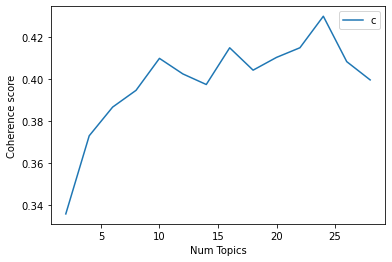

In [21]:
# Show graph
limit=30; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [22]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))
model_list

Num Topics = 2  has Coherence Value of 0.3357
Num Topics = 4  has Coherence Value of 0.3729
Num Topics = 6  has Coherence Value of 0.3866
Num Topics = 8  has Coherence Value of 0.3946
Num Topics = 10  has Coherence Value of 0.4098
Num Topics = 12  has Coherence Value of 0.4024
Num Topics = 14  has Coherence Value of 0.3973
Num Topics = 16  has Coherence Value of 0.4148
Num Topics = 18  has Coherence Value of 0.4042
Num Topics = 20  has Coherence Value of 0.4102
Num Topics = 22  has Coherence Value of 0.4148
Num Topics = 24  has Coherence Value of 0.4298
Num Topics = 26  has Coherence Value of 0.4082
Num Topics = 28  has Coherence Value of 0.3995


In [25]:
optimal_model = model_list[4]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=20))

[(0,
  '0.116*"个人信息" + 0.062*"个人信息保护法" + 0.042*"保护" + 0.029*"权益" + 0.026*"敏感" + '
  '0.022*"原则" + 0.016*"信息处理者" + 0.015*"权利" + 0.015*"完善" + 0.014*"侵害" + '
  '0.014*"制度" + 0.013*"影响" + 0.013*"法律" + 0.012*"实施" + 0.012*"信息处理" + '
  '0.010*"规则" + 0.010*"信息处理_活动" + 0.010*"目的" + 0.009*"泄露" + 0.009*"最小"'),
 (1,
  '0.061*"信息" + 0.054*"人脸" + 0.048*"人脸识别" + 0.036*"同意" + 0.028*"未成年人" + '
  '0.018*"技术" + 0.016*"信息处理者" + 0.014*"方式" + 0.013*"强制" + 0.013*"采集" + '
  '0.011*"征得" + 0.011*"自然人" + 0.010*"保护" + 0.010*"依法" + 0.009*"服务" + '
  '0.009*"对此" + 0.008*"权益" + 0.008*"认定" + 0.008*"小区" + 0.008*"单独"'),
 (2,
  '0.038*"保护" + 0.038*"发展" + 0.035*"互联网" + 0.032*"网络" + 0.024*"监管" + '
  '0.020*"行业" + 0.018*"中国" + 0.018*"规范" + 0.014*"数字" + 0.013*"方式" + 0.012*"发布" '
  '+ 0.012*"企业" + 0.012*"领域" + 0.011*"提升" + 0.010*"治理" + 0.010*"推动" + '
  '0.010*"建设" + 0.010*"平台" + 0.010*"相关" + 0.009*"权益"'),
 (3,
  '0.064*"个人信息" + 0.045*"保护" + 0.033*"法律" + 0.026*"个人信息保护法" + 0.022*"同意" + '
  '0.019*"信息" + 0.015*"条款" + 0.014*"相关" 

In [26]:
ldadf = []
for i in range(len(optimal_model.print_topics(num_words= 20))):
    topic = optimal_model.print_topics(num_words= 20)[i]
    topic_num = 'topic' + ' ' + str(i+1)
    for j in range(len(topic[1].split(" + "))):
        term = topic[1].split(" + ")[j].split("*")[1][1:-1]
        ldanum = topic[1].split(" + ")[j].split("*")[0]
        ldadf.append({"topic": topic_num, 'term':term, 'lda_num':ldanum})
ldadf = pd.DataFrame(ldadf)
print(len(ldadf), ldadf.term.nunique())
ldadf

200 141


,topic,term,lda_num
0,topic 1,个人信息,0.116
1,topic 1,个人信息保护法,0.062
2,topic 1,保护,0.042
3,topic 1,权益,0.029
4,topic 1,敏感,0.026
...,...,...,...
195,topic 10,圆通,0.008
196,topic 10,客户,0.007
197,topic 10,案件,0.007
198,topic 10,员工,0.007


In [43]:
# Visualize the topics
# Plotting tools
import pyLDAvis
# import pyLDAvis.gensim  # don't skip this
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt
%matplotlib inline

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(optimal_model, corpus, id2word)
vis

AttributeError: 'LdaMallet' object has no attribute 'inference'

In [27]:
ldadf.to_excel("CCTV LDAdf_final2.xlsx", index=False)

In [28]:
def format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,0.0,0.5610,"个人信息, 个人信息保护法, 保护, 权益, 敏感, 原则, 信息处理者, 完善, 权利, 制度",信息化 时代 个人信息 保护 群众 关心 现实 利益 通讯员 章善玉摄 □ 记者 朱 宁宁 ...
1,1,7.0,0.3737,"个人信息, 同意, 提供, 草案, 保护, 法律, 相关, 拒绝, 告知, 国家",□ 王 春晖 11 月 日 实施 中华人民共和国 个人信息保护法 国家 层面 建立 个人信息...
2,2,3.0,0.7659,"个人信息, 保护, 法律, 个人信息保护法, 同意, 信息, 条款, 相关, 社会, 数据_杀熟",月 31 日 江苏省 扬州市 汤 汪 中心小学 社区 志愿者 学生 介绍 防范 电信 诈骗 ...
3,3,7.0,0.3364,"个人信息, 同意, 提供, 草案, 保护, 法律, 相关, 拒绝, 告知, 国家",央视网 消息 记者 朱春燕 豆瑞华 11 月 日起 个人信息保护法 正式 施行 这是 我国 ...
4,4,5.0,0.2802,"消费者, 部门, 管理, 组织, 隐私, 社会, 维护, 违法, 服务, 提出",央视网 消息 日前 十三届 全国人大常委会 第三十次 会议 表决 中华人民共和国 个人信息保...
5,5,5.0,0.2236,"消费者, 部门, 管理, 组织, 隐私, 社会, 维护, 违法, 服务, 提出",11 月 日 个人信息保护法 正式 实施 10 月 28 日 中消协 发布 提示 未经 消费...
6,6,0.0,0.3371,"个人信息, 个人信息保护法, 保护, 权益, 敏感, 原则, 信息处理者, 完善, 权利, 制度",中新网 月 22 日电 全国人大常委会法制工作委员会 今日 记者会 发言人 臧铁伟 介绍 立...
7,7,5.0,0.1353,"消费者, 部门, 管理, 组织, 隐私, 社会, 维护, 违法, 服务, 提出",央视网 消息 最新 个人信息保护法 11 月 日 施行 网友 关心 APP 授权 不让 违法...
8,8,1.0,0.2129,"信息, 人脸, 人脸识别, 同意, 未成年人, 技术, 信息处理者, 方式, 强制, 采集",央视网 消息 记者 王汝希 十三届 全国人大常委会 第三十次 会议 月 日 表决 中华人民共...
9,9,0.0,0.3672,"个人信息, 个人信息保护法, 保护, 权益, 敏感, 原则, 信息处理者, 完善, 权利, 制度",十三届 全国人大常委会 第三十次 会议 月 17 日至 日 北京 13 日 全国人大常委会法...


In [29]:
df_dominant_topic.to_excel("CCTV_토픽별docu.xlsx",index=False)

### NER

In [30]:
import spacy
from spacy import displacy
import en_core_web_sm

nlp = en_core_web_sm.load()
def NER(lst):
    doc = nlp(lst)
    NERlst = []
    for X in doc.ents:
    #     NERlst.append((X.text, X.label_))
        if X.label_ == 'ORG':
            NERlst.append(X.text)

    return NERlst
qq =  df

qq['content'] = data_words_nostops
nlpdf = qq[['content']]
de_doc = []
for i in range(len(data_words_nostops)):
    t = ' '.join(data_words_nostops[i])
    de_doc.append(t)
qq['content'] = de_doc
nlpdf = qq[['content']]    
nlpdf['NER result'] = nlpdf['content'].apply(lambda x: NER(x))
nlpdf

<ipython-input-30-939e1312cae3>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nlpdf['NER result'] = nlpdf['content'].apply(lambda x: NER(x))


,content,NER result
0,信息化 时代 个人信息 保护 群众 关心 现实 利益 通讯员 章善玉摄 记者 宁宁 个人信息...,"[数字化 转型 高质量, 深入开展 置身, 程啸 这部, 民商事]"
1,春晖 实施 中华人民共和国 个人信息保护法 国家 层面 建立 个人信息 保护 制度 个人信息...,[自然人]
2,江苏省 扬州市 中心小学 社区 志愿者 学生 介绍 防范 电信 诈骗 保护 个人信息 知识 ...,"[中国 个人信息, 受访者 各种各样 个人信息]"
3,央视网 消息 记者 朱春燕 豆瑞华 日起 个人信息保护法 正式 施行 这是 我国 个人信息 ...,[]
4,央视网 消息 日前 十三届 全国人大常委会 第三十次 会议 表决 中华人民共和国 个人信息保...,[同意权 知情权 第十五条]
5,个人信息保护法 正式 实施 中消协 发布 提示 未经 消费者 同意 经营者 消费者 推送 商...,[]
6,中新网 日电 全国人大常委会法制工作委员会 今日 记者会 发言人 臧铁伟 介绍 立法 工作 ...,[中新网]
7,央视网 消息 最新 个人信息保护法 施行 网友 关心 app 授权 不让 违法 公民 有权 ...,[]
8,央视网 消息 记者 王汝希 十三届 全国人大常委会 第三十次 会议 表决 中华人民共和国 个...,[]
9,十三届 全国人大常委会 第三十次 会议 日至 北京 全国人大常委会法工委 记者会 通报 本次...,[]


In [31]:
from nltk.probability import FreqDist
NERll = nlpdf['NER result'].sum()
fdist = FreqDist(NERll)
top_20 = fdist.most_common(20)
top_20

[('自然人', 8),
 ('中新网', 4),
 ('一揽子', 4),
 ('处处长', 4),
 ('中国 个人信息', 3),
 ('受访者 各种各样 个人信息', 2),
 ('角度 个人信息', 2),
 ('专门性', 2),
 ('数字化', 2),
 ('势在必行', 2),
 ('非必要 个人信息', 2),
 ('数字化 转型 高质量', 1),
 ('深入开展 置身', 1),
 ('程啸 这部', 1),
 ('民商事', 1),
 ('同意权 知情权 第十五条', 1),
 ('收集 个人信息 一揽子', 1),
 ('指导 监督 个人信息', 1),
 ('赔偿 责任 劳东燕', 1),
 ('系统 性质 变化 个人信息保护法', 1)]